# Milestone Preliminary Analysis
# Regression, correlations, and sample SVM

The code below performs some exploratory analysis of a small, simplified data set that contains some variables of a much larger data set, which is in the process of being cleaned and extracted. In here, we will accomplish three main things.
* Obtain correlations between a few of the measured variables and h.
* Interpret these for intuition on which variables are the most important
* Create a scarecrow SVM that uses these variables to predict a value of h

In [1]:
#Import the various libraries and plots
import pandas as pd
import scipy as sc
import numpy as np
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt  
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

#Read in the prepared data

data = pd.read_csv('summerdata_easy.csv')

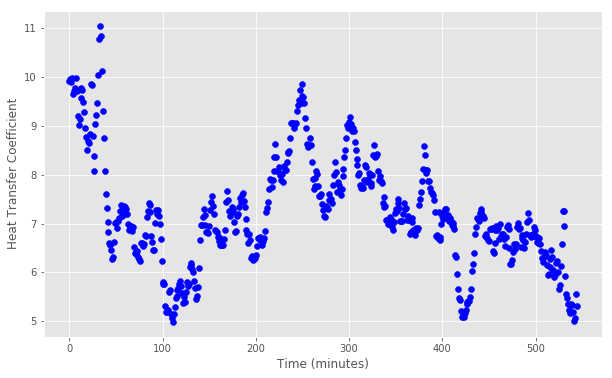

In [2]:
#In order to get a clearer picture we will remove outlying data

#We will also first re-arrange time to be more intuitive.

i = 0
while i <= len(data):
    data.Time[i] = i
    i += 1

#These rewrites time in terms of minutes, since each row is averaged values over a minute.

#Then we will select for values of h that are reasonable (ie -8000 needs to be removed)
data = data[data.h >= 0]
data = data[data.h <= 100]

#Now we can plot an example of some of the time vs h
plt.scatter(x=data['Time'],y=data['h'],c='b',marker='o',label='Time vs h')

plt.xlabel('Time (minutes)')
plt.ylabel('Heat Transfer Coefficient')
plt.show()

               Time  CNR_SWup  CNR_SWdn  CNR_LWup  CNR_LWdn  HMP_TempC  \
Time       1.000000  0.399079  0.388811 -0.976458 -0.904166  -0.931606   
CNR_SWup   0.399079  1.000000  0.963062 -0.474345 -0.287638  -0.389200   
CNR_SWdn   0.388811  0.963062  1.000000 -0.445050 -0.243586  -0.323530   
CNR_LWup  -0.976458 -0.474345 -0.445050  1.000000  0.911478   0.945705   
CNR_LWdn  -0.904166 -0.287638 -0.243586  0.911478  1.000000   0.957077   
HMP_TempC -0.931606 -0.389200 -0.323530  0.945705  0.957077   1.000000   
HMP_RH     0.757188  0.487216  0.394824 -0.831833 -0.852166  -0.917396   
CupWS_ms  -0.118576 -0.038411  0.032676  0.119511  0.255562   0.221443   
CupWD     -0.263691  0.138236  0.155377  0.247275  0.316337   0.315155   
CupWD_SD  -0.149841 -0.163708 -0.090204  0.197411  0.369725   0.302949   
q          0.654241  0.590831  0.527858 -0.699633 -0.799402  -0.802455   
h         -0.310195 -0.364257 -0.396552  0.332045  0.531725   0.397528   

             HMP_RH  CupWS_ms     Cup

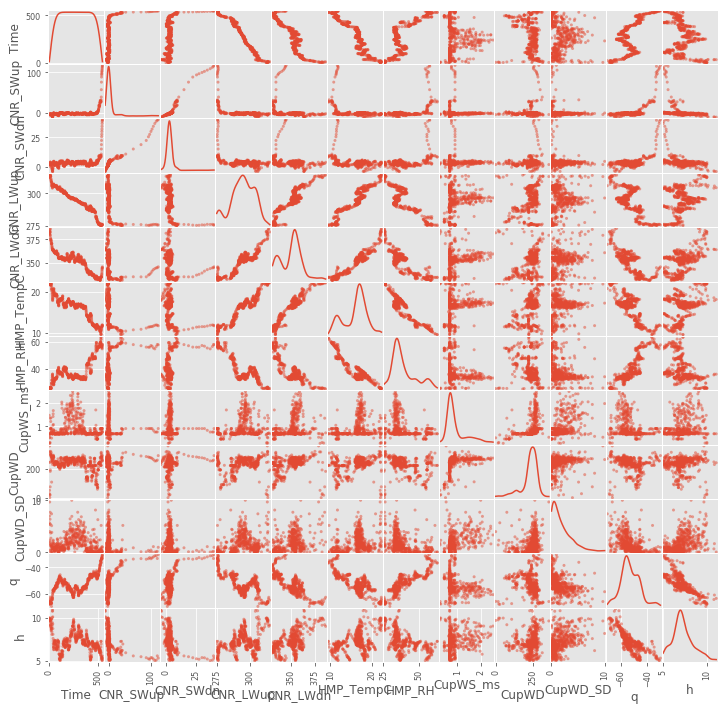

In [3]:
#Now we can display the correlations of each variable in the set along with a scatterplot
print(data.corr())
pd.plotting.scatter_matrix(data, figsize=(12, 12), diagonal='kde')
plt.show()

The most important part of the scatterplot to interpret is the last row corresponding to each variables impact on h.
<br/>

These scatterplots give us a way to intuit how each variable correlates with h, and the numerical correlation is also reported.
<br/>
It is important to note that because the data set is very small in this preliminary analysis, these are not accurate results, but it is essential to gain knowledge about these different variables observed effect on h. The higher the correlation, the more important it is to measure and account for these variables because they are not accounted for in typical physical models.
<br/>

With the much larger, cleaned data set we should be able to see clearer correlations. Using these will allow us to select for the most important features to include in our SVM.
<br/>

Below, an SVM is constructed such that we can use this small data set to show what the process of predicting h will look like. The full analysis will explore several different techniques (SVM, neural networks, etc.) and determine which is best suited for wind farms.

# SVM predictions

The largest issue with these supervised learning methods is the problem of dimensionality. The amount of data needed as the number of "features" increases, increases exponentially. In predicting a value, this becomes quite data heavy. So for this small initial data set, we will split the classification into a "high" and a "low" h value using its descriptions.

In [4]:
#Describe our h values to determine the high and low range
data.h.describe()

count    545.000000
mean       7.208701
std        1.121844
min        4.993336
25%        6.574826
50%        7.062993
75%        7.849203
max       11.045594
Name: h, dtype: float64

So, we can see we have succeeded in creating a fairly accurate SVM for our admittedly small sample. This was simply classifying the h value as high and low; what about a regression where we can accurately predict the value of h?

# SVR (Regression)

In [5]:
#Now we run a SVR regression

from sklearn.svm import SVR

X = data
y = data['h']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
model = SVR(C=1.0, epsilon=0.2)
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

print('Accuracy = ', model.score(X = X_test, y = y_test))

Accuracy =  0.24734383876625965


Not very good. This is because of the very small sample size, as well as the simplicity of the method. The full analysis will use much larger data and experiment with different types of regressions including neural networks. 

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression


In [7]:
# MLP regression with Scikit-Learn

scaler = StandardScaler()
scaler.fit(X_train) # Fit only to the training data

# Apply scaling to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp_reg = MLPRegressor(hidden_layer_sizes=(12,12),verbose=0,random_state=2,solver='adam')
#print(mlp_reg.get_params())

mlp_reg.fit(X_train, y_train)

print(mlp_reg.score(X_test,y_test)) # score = 1 is good

0.5228825056286209


C:\Users\adamv_000\anacondatry2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Data Splicing

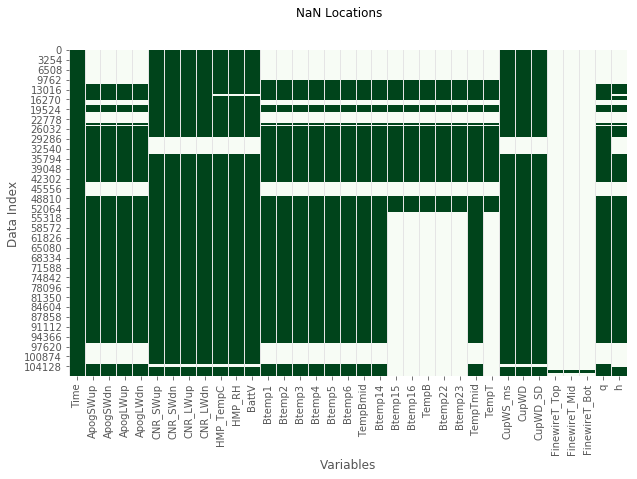

The dark green indicates data values and the light green indicates NaNs


In [8]:
import seaborn as sb

plt.close()

#upload the data
full_data = pd.read_csv('summerdata.csv')

def NaNmap(dataframe):
    
    #filter the data to find where NaN's are
    mask = np.logical_not(np.isnan(dataframe))
    data_exists = np.where(mask, 1, 0)

    #make a graph showing where the data exists
    sb.heatmap(data_exists, cmap = 'Greens', cbar = False, xticklabels = dataframe.columns)
    plt.suptitle('NaN Locations')
    plt.xlabel('Variables')
    plt.ylabel('Data Index')
    plt.show()
    print('The dark green indicates data values and the light green indicates NaNs')
    
NaNmap(full_data)

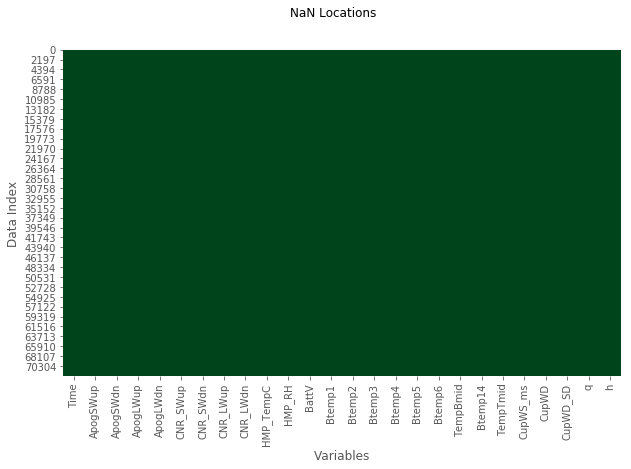

The dark green indicates data values and the light green indicates NaNs
missing data locations
(array([ 4922,  4922,  4922,  4922,  4922,  4922,  4922,  7175,  7175,
        7175,  7175,  7175,  7175,  7175, 11980, 11980, 11980, 11980,
       11980, 11980, 11980, 16164, 16164, 16164, 16164, 16164, 16164,
       16164, 21246, 21246, 21246, 21246, 21246, 21246, 21246],
      dtype=int64), array([ 5,  6,  7,  8, 21, 22, 23,  5,  6,  7,  8, 21, 22, 23,  5,  6,  7,
        8, 21, 22, 23,  5,  6,  7,  8, 21, 22, 23,  5,  6,  7,  8, 21, 22,
       23], dtype=int64))


In [9]:
#first we filter all data where we don't have an H value
h_mask = np.logical_not(np.isnan(full_data['h']))
h_filtered = full_data[h_mask]

#next we drop all columns with mostly no data
column_filter = h_filtered.dropna(axis = 1, thresh = 35000)

#show where/if we're still lacking data
NaNmap(column_filter)

#check for any more NaN's not visible on the heatmap
print('=======================')
print('missing data locations:')
print(np.where(np.isnan(column_filter)))

#remove the rows still missing data
easy_data = column_filter.dropna(axis = 0, thresh = 25)

#save the data to a csv
easy_data.to_csv('easy_data.csv')

# Variable Selection on the full data

In [10]:
#scale the data
scaled_data = scale(easy_data)
scaled_dataframe = pd.DataFrame(scaled_data, columns = easy_data.columns)

#make a predictors and target variable to make the function inputs comprehensible
scaled_predictors = scaled_dataframe[scaled_dataframe.columns[0:len(scaled_dataframe.columns)-1]]
scaled_target = scaled_dataframe[scaled_dataframe.columns[len(scaled_dataframe.columns)-1]]

predictors = easy_data[easy_data.columns[0:len(easy_data.columns)-1]]
target = easy_data[easy_data.columns[len(easy_data.columns)-1]]

## sklearn.feature_selection

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

vars_test = SelectKBest(f_regression, 3)

vars_test.fit(scaled_predictors, target)

SelectKBest(k=3, score_func=<function f_regression at 0x0000016BBED2F510>)

In [16]:
print(scaled_predictors.columns[vars_test.get_support()])

Index(['HMP_TempC', 'HMP_RH', 'CupWD_SD'], dtype='object')


In [13]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel = 'linear')
selector = RFE(estimator, 3, step=1)
selector = selector.fit(scaled_predictors, scaled_target)

In [23]:
best_vars = predictors.columns[selector.get_support()]
print(best_vars)

Index(['ApogSWup', 'Btemp1', 'Btemp4'], dtype='object')


In [25]:
print('rankings of the variables:')
for x in range(len(scaled_predictors.columns)):
    print('===========================')
    print(scaled_predictors.columns[x])
    print(selector.ranking_[x])

rankings of the variables:
Time
20
ApogSWup
1
ApogSWdn
9
ApogLWup
4
ApogLWdn
22
CNR_SWup
11
CNR_SWdn
10
CNR_LWup
14
CNR_LWdn
18
HMP_TempC
17
HMP_RH
15
BattV
16
Btemp1
1
Btemp2
7
Btemp3
5
Btemp4
1
Btemp5
6
Btemp6
3
TempBmid
12
Btemp14
8
TempTmid
13
CupWS_ms
23
CupWD
21
CupWD_SD
19
q
2


In [28]:
X = scaled_predictors[best_vars]
y = scaled_target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
model = SVR(kernel = 'linear')
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

print('Accuracy = ', model.score(X = X_test, y = y_test))

Accuracy =  -0.0010966368298124252


In [15]:
2+2

4

## PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit(scaled_predictors)
print(pca_fit.components_)
a = pca_fit.explained_variance_ratio_
np.sum(a)

[[-2.54971101e-02  2.25479977e-01  2.01059285e-01  9.98762703e-02
   2.32506111e-01  2.15312999e-01  2.09977960e-01  1.05670604e-01
   2.25413493e-01  1.89682888e-01 -1.45876967e-01  2.03925196e-01
   2.40405930e-01  2.40070650e-01  2.40346166e-01  2.40310738e-01
   2.39958897e-01  2.40220879e-01  2.40053761e-01  2.40235566e-01
   2.39351607e-01  6.49097016e-02 -1.03518033e-01  1.15915428e-01
   2.13428649e-01]
 [-3.30267501e-01  1.47591392e-01  1.84101026e-01 -5.77784276e-01
  -1.19149610e-01  1.64514986e-01  1.89346049e-01 -5.68254712e-01
  -7.55182485e-02 -1.56360801e-01 -1.03885127e-01  4.32317513e-02
  -1.37239945e-03 -1.17120433e-02 -1.66375952e-03 -4.94018083e-05
   2.85851579e-03  6.19477415e-03  1.02226547e-02  4.23486456e-03
  -1.29286786e-02 -5.03954230e-02 -1.35680016e-01 -1.59733967e-01
   1.07845592e-01]
 [-4.40010014e-01 -1.30765404e-01 -9.91508782e-02 -3.04907682e-02
   6.63130727e-02 -1.24533700e-01 -1.03114092e-01 -7.82601368e-02
  -1.78269620e-02  2.85457409e-01 -4.3

0.8391222634642233